## Lane Emden Equation

In [1]:
using LinearAlgebra
# using Plots
using PyCall
using PyPlot
using DataFrames
using CSV
using Symbolics
using Integrals
using DifferentialEquations
# plotlyjs()
matplotlib.use("TkAgg")

In [79]:
function RK4(f::Function,xlim,y₀,h;stopidx=1,stopval=1e-6)
    xᵢ = xlim[1]:h:xlim[2]
    # print(y₀,'\t',zeros(length(xᵢ)-1,length(y₀)),'\n')
    yᵢ = [transpose(y₀);zeros(length(xᵢ)-1,length(y₀))]
    # print(yᵢ,'\n')

    for (x,y,i) in zip(xᵢ, eachrow(yᵢ),2:length(xᵢ))
        k₁ = h*f(x,y)
        k₂ = h*f(x+h/2,y+k₁/2)
        k₃ = h*f(x+h/2,y+k₂/2)
        # print(x,' ',y,' ',k₃, '\n')
        k₄ = h*f(x+h,y+k₃)

        yᵢ[i,:] = y + (k₁+2*k₂+2*k₃+k₄)/6
        if yᵢ[i,stopidx] <= stopval || yᵢ[i,stopidx] + k₁[1]/2 <= stopval || yᵢ[i,stopidx] + k₂[1]/2 <= stopval || yᵢ[i,stopidx] + k₃[1] <= stopval
            return xᵢ[1:i] ,yᵢ[1:i,:]
        end
    end
    return xᵢ,yᵢ
end


RK4 (generic function with 1 method)

### Defining the functions for Lane Emden to work with RK4
1. $\theta_2 = -\theta^n - \frac{\theta^\prime}{\xi}$
2. $\theta_1 = \theta^\prime$

For non relativistic gas, we have $\gamma=5/3$ hence $n=3/2$. ($\gamma = 1 + 1/n$)

In [99]:
function θ₂(ξ,θ,θ′;n=3/2)
    -θ^n - (2/(ξ+1e-6))*θ′    # to avoid division by zero 1e-6 is added in the denominator
end

function θ₁(θ′)
    θ′
end

function Lane_Emden(ξ,θθ′;n=3/2)
    θ,θ′=θθ′

    [θ₁(θ′),θ₂(ξ,θ,θ′;n=n)]
end

Lane_Emden (generic function with 1 method)

### Solving the Lane Emden Equation

In [105]:
ξ,θθ′ = RK4(Lane_Emden, [0,3],[1,0],0.01); # This runs till θ reaches 0

#### Pressure and Density Profile

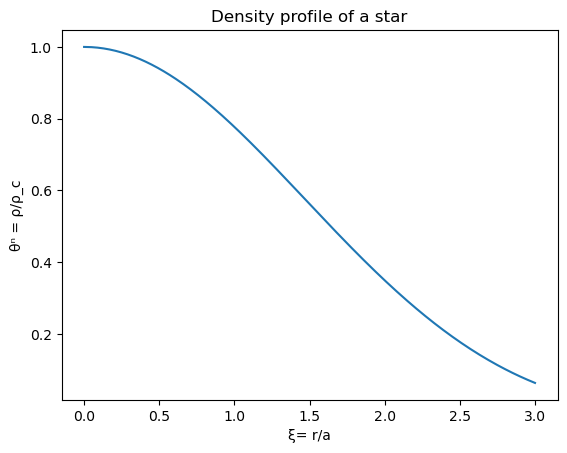

In [106]:
close("all")
plot(ξ,θθ′[:,1].^(3/2))
title("Density profile of a star")
ylabel("θⁿ = ρ/ρ_c")
xlabel("ξ= r/a")
# plot(ξ,θθ′[:,2])
gcf()

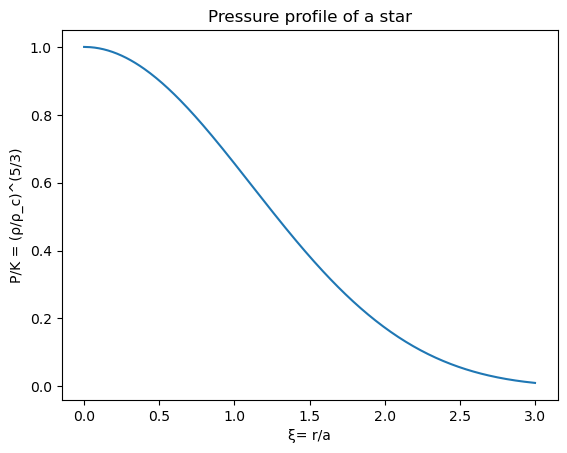

In [107]:
close("all")
plot(ξ,(θθ′[:,1].^(3/2)).^(5/3))
title("Pressure profile of a star")
ylabel("P/K = (ρ/ρ_c)^(5/3)") # P = K(ρ/ρ_c)^(5/3)
xlabel("ξ= r/a")
# plot(ξ,θθ′[:,2])
gcf()

### Properties of Star
Calculating for the Sun:
1. Central Density of the Sun $ \rho_c = 1.622 \times 10^{2} g/cm^3$
2. Central Pressure: $P_c = 2.477 \times 10^{17} g/cm ~s^2$

From this we can derive the constant K using the polytropic equation <br>
I unfortunately do not get good values for either the mass or the radius

In [131]:
P_c = 2.477e17
ρ_c = 1.622e2
K = P_c/(ρ_c^(5/3))
G = 6.67430e−8
n = 3/2
a = (((n+1)*K*ρ_c^(1/n-1))/(4π*G))^0.5

5.297541455255309e9

Radius of the Sun: $r = a\xi$

In [132]:
r = a*ξ[end]/1e5

158926.24365765927

#### Mass of the Sun
Mass of the star is given by: $M = 4\pi \rho_c R^3 (-\frac{1}{\xi}\frac{d\theta}{d\xi})_{\xi = \xi_1}$
<br> Where $\xi_1$ is the value at the surface of the star

Source: [link](https://www.astro.physik.uni-potsdam.de/~htodt/ca/lane-emden.pdf)

In [119]:
θθ′[end,2]/ξ[end]

-0.09475088274905798

In [133]:
M = 4π*ρ_c*r^3*(-θθ′[end,2]/ξ[end])

7.752304708795588e17

Unfortunately I couldn't really figure out the rest of the problem about fluid oscillations in time